# 1. Non-Linear Regression Definition

    * To model non-linear relationship between the independent variables (X features) and the dependent variable (y target)
    * y_predict (out of model) must be a non-linear function of parameters (weight of function) and not necessary the features X


### 1.2 Non-linear shape possibilites:
    * Exponential
    * Logarithmic
    * Logistic
    * ....
    
### 1.3 Recognize if a problem is linear or non-linear
    * Visually : figure out relation by ploting bivariate plots of target vraiable (y) with each feature (x)
    * Estimate correlation coefficient between features (x) and target variable (y), if for all features it is >= 0.7, then it is linear tendency ==> not necessary to fit non-linear rregression
    * Based on accuracy : if linear model dont get good accuracy ==> try with non-linear regression
    
### 1.4 Data modeling in non-linear contexte
    * Polinomial regression
    * Non-linear regression model
    * Transform the data

# 2. Coding side for Non-Linear Regression

## 2.2 Load, read, plot and split data

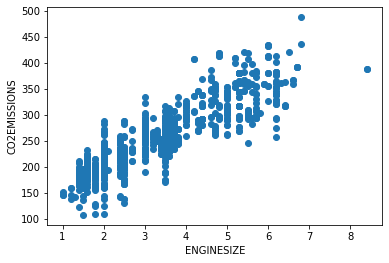

train data : 
   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
5         3.5          6                  10.0           230
------------------------------------------------------------
test data : 
    ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
1          2.4          4                   9.6           221
8          3.7          6                  11.6           267
23         2.0          4                  10.0           230
33         3.0          6                  11.2           258
40         2.0          4                   9.2           212


In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
"""
Reading dataset

Recall:
------
target_variable (y) : Emission
Features (x) : the remainder variables
"""

data_consumption = pd.read_csv("FuelConsumption.csv", sep =",")
# restrict data for some columns : 'ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS'
data_consumption = data_consumption[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

"""
Plot data to see the distribution : 
"""
plt.scatter(data_consumption["ENGINESIZE"], data_consumption["CO2EMISSIONS"])
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

"""
Create train and test split dataset
"""
mask = np.random.rand(len(data_consumption)) < 0.8
train = data_consumption[mask]
test = data_consumption[~mask]

print("train data : ")
print(train.head())
print("--"*30)
print("test data : ")
print(test.head())

## 2.3 Quadratic regression 

In [28]:
from sklearn.preprocessing import PolynomialFeatures

"""
Transform data by using PolynomialFeatures
"""
X_train = np.asanyarray(train[["ENGINESIZE"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])

X_test = np.asanyarray(test[["ENGINESIZE"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])


"""
Set the polynome transormer to degree 2 (quatratic)
"""
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)


from sklearn.linear_model import LinearRegression
"""
Train linear regression model over the transfomed data (polynomial out)
"""
lr = LinearRegression().fit(X_train_poly, y_train)



from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
"""
Evaluation
"""
X_test_poly = poly.fit_transform(X_test)

predict_y = lr.predict(X_test_poly)
print("Evaluation : ")
print("#"*13)

print("Mean absolute error of model is %.2f " % mean_absolute_error(predict_y, y_test))
print("Mean square arror model is %.2f " % mean_squared_error(predict_y, y_test))
print("R2-score error of model is %.2f " % r2_score(predict_y, y_test))



Evaluation : 
#############
Mean absolute error of model is 23.77 
Mean square arror model is 996.96 
R2-score error of model is 0.67 


In [29]:
from sklearn.preprocessing import PolynomialFeatures

"""
Transform data by using PolynomialFeatures
"""
X_train = np.asanyarray(train[["ENGINESIZE"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])

X_test = np.asanyarray(test[["ENGINESIZE"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])


"""
Set the polynome transormer to degree 2 (quatratic)
"""
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)


from sklearn.linear_model import LinearRegression
"""
Train linear regression model over the transfomed data (polynomial out)
"""
lr = LinearRegression().fit(X_train_poly, y_train)



from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
"""
Evaluation
"""
X_test_poly = poly.fit_transform(X_test)

predict_y = lr.predict(X_test_poly)
print("Evaluation : ")
print("#"*13)

print("Mean absolute error of model is %.2f " % mean_absolute_error(predict_y, y_test))
print("Mean square arror model is %.2f " % mean_squared_error(predict_y, y_test))
print("R2-score error of model is %.2f " % r2_score(predict_y, y_test))



Evaluation : 
#############
Mean absolute error of model is 23.77 
Mean square arror model is 997.74 
R2-score error of model is 0.67 
